# 《Python 大战机器学习》阅读
# 第一章 线性模型

## 线性回归

### 最小二乘

对于线性回归问题，定义损失函数为平方函数时，产生的优化问题:
$$arg \underset{\beta}{min} \sum (Y-X\beta)^{T}(Y-X\beta)$$
可以考虑使用梯度下降法来求解；

作者提到，在做梯度下降前，需要进行**归一化(标准化)**:
+ 提升模型的收敛速度，避免因为量纲不同而产生之字形的下降路线
+ 减少量纲的影响

求矩阵微商，即最优解应当是:
$$\frac{\delta f}{\delta \beta} = 2X(X\beta - Y)=0，$$故
$$\hat{\beta}=(X^{T}X)^{-1}X^T y$$

### 带正则项的最小二乘
由于$X^TX$不一定是满秩矩阵，因此常考虑引入正则项，即L1正则化或者L2正则化：
$$arg \underset{\beta}{min} \sum (Y-X\beta)^{T}(Y-X\beta)+ \lambda ||\beta||_2^2$$

### 单元线性回归

#### 一个简单的例子

In [1]:
from sklearn import linear_model,datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# 此处使用一个糖尿病的数据
diabetes = datasets.load_diabetes()

diabetes这个数据是一个字典，包括数据和label部分：
+ 共有442个样本
+ 每个样本有10个特征

In [3]:
print len(diabetes['data']), len(diabetes['target'])

442 442


In [4]:
diabetes.data.shape

(442, 10)

In [5]:
# 单变量回归
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [6]:
# 新建一个linear model对象
regr = linear_model.LinearRegression()

# 将训练集代入进去
regr.fit(diabetes_X_train, diabetes_y_train)

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print '系数是:\n', regr.coef_

系数是:
[ 938.23786125]


In [8]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Mean squared error: 2548.07


In [9]:
# R方
print '方差解释 %.2f' % regr.score(diabetes_X_test, diabetes_y_test)

方差解释 0.47


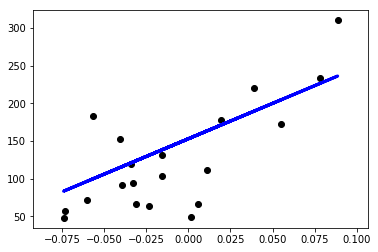

In [10]:


# 绘图
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test),color='blue',
        linewidth=3)


#### LinearRegression类
原型是:
class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_x=True,n_jobs=1)


**参数**:
+ fit_intercept:bool型，即是否需要截距
+ copy_x: 设置是否需要copy x
+ n_jobs:并行的CPU个数，-1表示使用所有CPU
+ normalize: 若设置为True，则在建模之前会先标准化

**属性**：
+ coef:权重向量
+ intercept： b值

**方法**:
+ fit(X,y[,sample_weight]): 训练模型
+ predict：预测
+ score(x,y[,sample_weight]):测试集的R2

下面使用糖尿病的数据来建立单变量线性回归

In [11]:
from sklearn import cross_validation
# 定义读取和切分训练集以及测试集的函数
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target,
                                            test_size=0.25, random_state=0)
    

/Users/yanghao/anaconda/envs/py2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# 建模的函数
def test_LinearRegression(*data):
    X_train, X_test,y_train,y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print '系数是 %s, 截距是 %.2f' % (regr.coef_, regr.intercept_)
    print '残差平方和是 %.2f' % np.mean((regr.predict(X_test)-y_test) ** 2)
    print 'R方是: %.2f' % regr.score(X_test, y_test)

In [22]:
X_train, X_test, y_train, y_test = load_data()
test_LinearRegression(X_train, X_test, y_train, y_test)

系数是 [ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], 截距是 153.07
残差平方和是 3180.20
R方是: 0.36


In [24]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

## 带正则项的多元线性回归
添加正则项，其实可以理解为一个带约束的优化问题，而带约束即可以理解为为beta引入了先验分布，控制了模型空间。

+ 岭回归：2范数
+ lasso：1范数
+ Elastic net： 二者的加权

### 岭回归
$$L(w) = (Y-Xw)^T(Y-Xw)+\alpha ||w||_2^2$$

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=False,copy_x=True, max_iter=None,tol=0.001,solver='auto',random_state=None)

**参数**:
+ alpha: 超参数
+ max_iter:最大迭代次数
+ solver：求解这个最优化问题的时候的算法
  + auto：根据数据集自动选择
  + svd：奇异值分解
  + cholesky: scipy.linalg.solve
  + sparse_cg: scipy.sparse.linalg.cg Use Conjugate Gradient iteration to solve ``Ax = b``.

  + lsqr:scipy.sparse.linalg.lsqr;运算速度最快
  + sag:使用stochastic average gradient descent算法
  
+ tol：判断是否收敛的阈值
+ random_state:随机数生成器的种子

**属性**：
+ coef_: 权重向量
+ intercept_:b
+ n_iter:实际迭代次数

**方法**:
+ fit,predict,score

In [36]:
reg_ridge = linear_model.Ridge(solver='sag')
reg_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [37]:
reg_ridge.score(X_test,y_test)

0.35693603820703668

In [47]:
# 看看不同alpha下R方的变化趋势
n_alpha = 200
alphas = np.logspace(-10,2,n_alpha)

In [48]:
model_ridge = linear_model.Ridge()
coefs, scores=[],[]

In [49]:
for alpha in alphas:
    model_ridge.set_params(alpha=alpha)
    model_ridge.fit(X_train,y_train)
    coefs.append(model_ridge.coef_)
    scores.append(model_ridge.score(X_test,y_test))

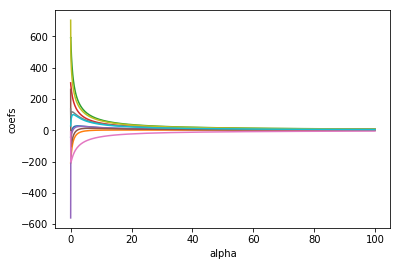

In [50]:
plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')

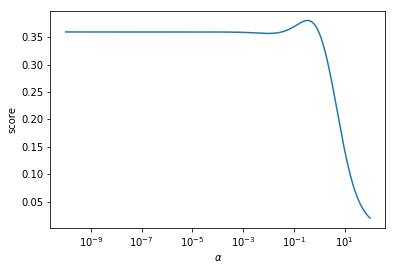

In [55]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(alphas, scores)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'score')
ax.set_xscale('log')

### Lasso回归
Lasso回归是一范数,可以将系数压缩到0
相比于岭回归，多了参数：
+ precompute: 是否提前计算Gram矩阵来加速计算
+ positive: 是否强制要求系数都为正数
+ selection:cyclic或者random，每轮迭代的时候，选择权重向量的哪一个来更新，random是随机选择一个分量来更新，而cyclic是从前向后依次选择
+ warm_start:是否选择前一次的训练结果继续训练


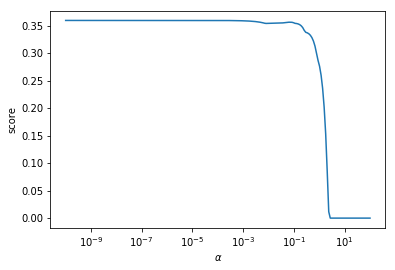

In [68]:
model_lasso = linear_model.Lasso()
coefs, scores=[],[]
for alpha in alphas:
    model_lasso.set_params(alpha=alpha)
    model_lasso.fit(X_train,y_train)
    coefs.append(model_lasso.coef_)
    scores.append(model_lasso.score(X_test,y_test))

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(alphas, scores)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'score')
ax.set_xscale('log')

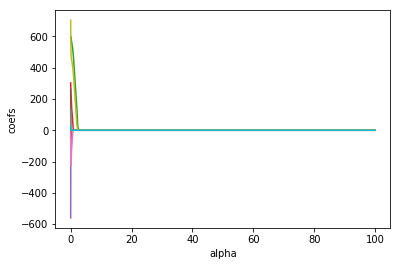

In [69]:
plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')

### Elastic net
$$\alpha \rho ||w||_1 + \frac{\alpha (1-\rho)}{2}||W||_2^2$$